# Bayesian Beta-Geometric Negative Binomial Distribution Using PyMc3


By James Nesfield
    
Purpose Create a Bg-NBD model using bayesian methods.

## dependencies

In [1]:
!pip install lifetimes

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import os 
from lifetimes.datasets import load_dataset
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import BetaGeoFitter
import matplotlib.pyplot as plt
from scipy.stats import beta, gamma
%matplotlib inline


## load data

In [3]:
transactions = load_dataset(
    filename='CDNOW_sample.txt', 
    header=None, 
    delim_whitespace=True, 
    names=['customer_id', 'customer_index', 'date', 'quantity', 'amount'],
    converters={'date': lambda x: pd.to_datetime(x, format="%Y%m%d")}
)

transactions.head(3)

,customer_id,customer_index,date,quantity,amount
0,4,1,1997-01-01,2,29.33
1,4,1,1997-01-18,2,29.73
2,4,1,1997-08-02,1,14.96


In [4]:
transactions.describe()

,customer_id,customer_index,quantity,amount
count,6919.000000,6919.000000,6919.000000,6919.000000
mean,11682.515826,1175.724816,2.381703,35.278500
std,6833.386793,679.426450,2.218380,34.074377
min,4.000000,1.000000,1.000000,0.000000
25%,5525.000000,570.500000,1.000000,14.490000
50%,11749.000000,1193.000000,2.000000,25.990000
75%,17717.000000,1766.000000,3.000000,42.970000
max,23569.000000,2357.000000,40.000000,506.970000


In [5]:
transactions.customer_id.nunique()

2357

In [6]:
transactions.customer_index.nunique()

2357

In [7]:
transactions.quantity.nunique()

26

array([[<AxesSubplot:title={'center':'quantity'}>]], dtype=object)

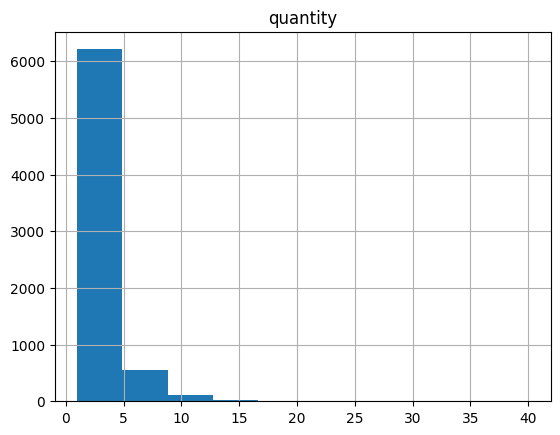

In [8]:
transactions.hist(column = 'quantity')

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

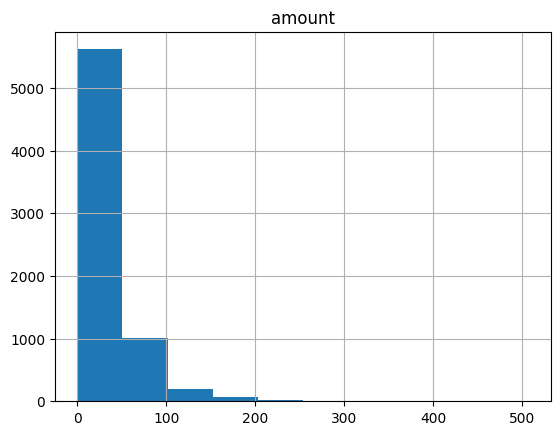

In [9]:
transactions.hist(column = 'amount')

### basic notes on data

we have 2357 customers with a total of 6919 transactions. we see most customers buy low amounts.

## Use lifetimes to convert to RFM format with calibration and hold out data

In [10]:
rfm_cal_holdout = calibration_and_holdout_data(transactions=transactions,
                                               customer_id_col='customer_id', 
                                               datetime_col='date',
                                               monetary_value_col = 'amount',
                                               freq='W',
                                               calibration_period_end='1998-01-01',
                                               observation_period_end='1998-06-30' )

rfm_cal_holdout.head(3)

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
customer_id,,,,,,,
4,3.0,49.0,52.0,23.723333,0.0,0.0,26.0
18,0.0,0.0,52.0,0.000000,0.0,0.0,26.0
21,1.0,2.0,52.0,11.770000,0.0,0.0,26.0


## fit bg-nbd

In [11]:
#get some basics with betageofitter
n = rfm_cal_holdout.shape[0]
x = rfm_cal_holdout["frequency_cal"].to_numpy()
t_x = rfm_cal_holdout["recency_cal"].to_numpy()
T = rfm_cal_holdout["T_cal"].to_numpy()

# convenient indicator function
int_vec = np.vectorize(int)
x_zero = int_vec(x > 0)

# fit BG/NBD model
bgf = BetaGeoFitter()
bgf.fit(frequency=x, recency=t_x, T=T)

bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.281847,0.014034,0.254340,0.309354
alpha,6.732810,0.532304,5.689494,7.776126
a,0.532360,0.122632,0.292000,0.772719
b,1.971260,0.575322,0.843628,3.098892
